# 4강  
## Backprop / NN

#### Where we are... 
We want $\nabla w L$ -> 가중치에 따른 L  
경사 하강을 할 때 수치적 경사가 있고 분석적 경사가 있었는데  
수치적 방법은 느리나 작성하기 쉽고 분석적은 빠르고 정확하나  
식 작성에서 실수하기가 쉬워 실제에선 분석적 경사를 쓴 후 수치적 경사로 검산하는 식임

## So.. today we gonna talk about 계산 그래프(coputational graph)

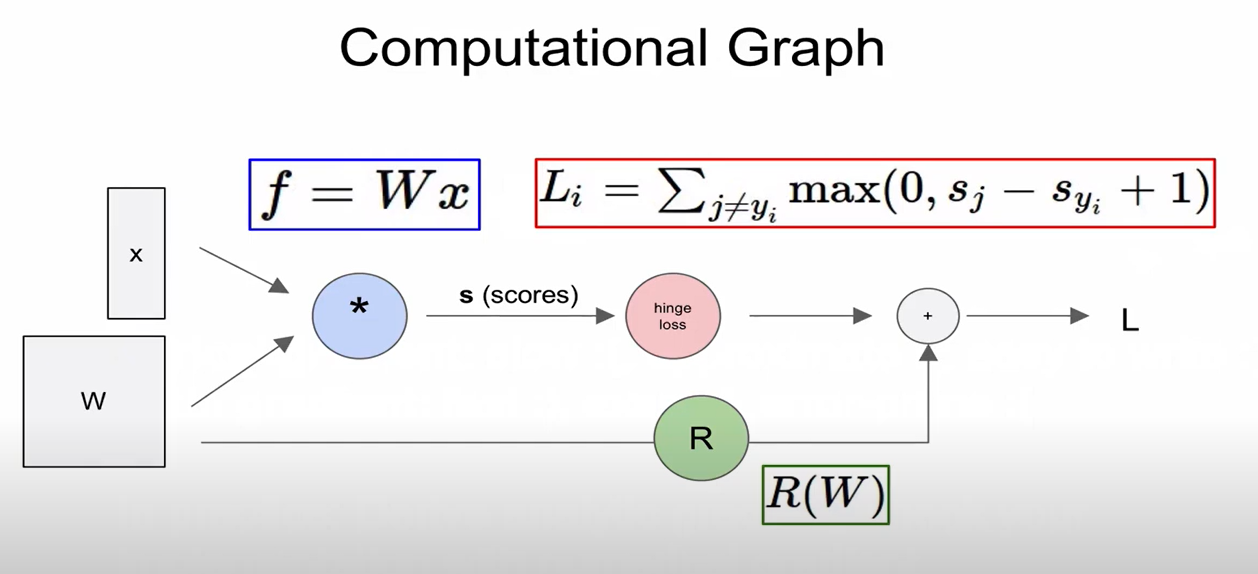

입력은 x와 W이고, 곱하기 노드는 행렵 곱셈을 의미함.  
x*W -> score v 출력 -> hinge loss로 변경해주고 아래에 있는 정규화 항과 더해주면 전체 손실L이 나옴.  
### CG의 장점은 backpropagation(역전파)라고 불리는 테크닉을 사용 할 수 있다는 것임

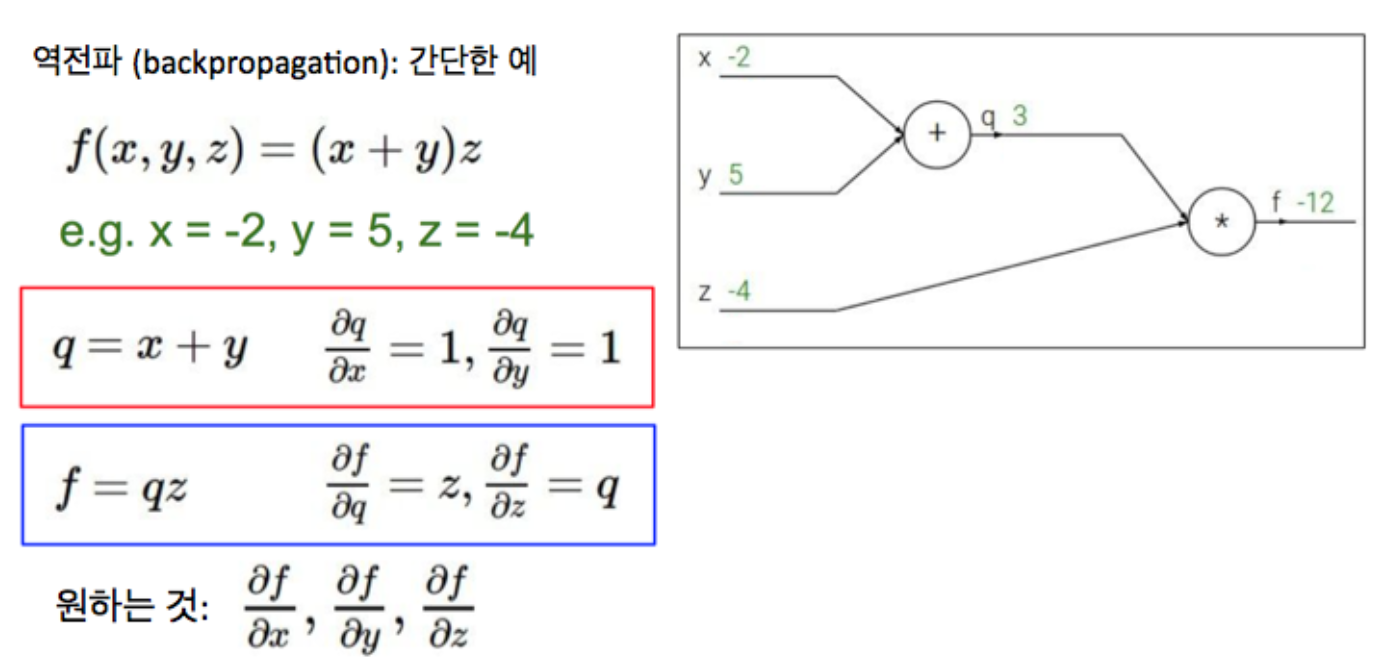

체인 룰을 반복적으로 적용시켜 뒤에서부터 계산하면 됨.  
맨 처음, 즉 맨 뒤 $\partial f \over \partial f$는 당연히 1임  
$\partial f \over \partial z$는 f를 z로 미분한, 즉 q임을 위에서 알 수 있음  
이런식으로 계속해서 뒤로 계산해 나가는 것이 backprop  
참고로 + 연산은 전달하는 기능만 해서 경사 분배기 라고 함.

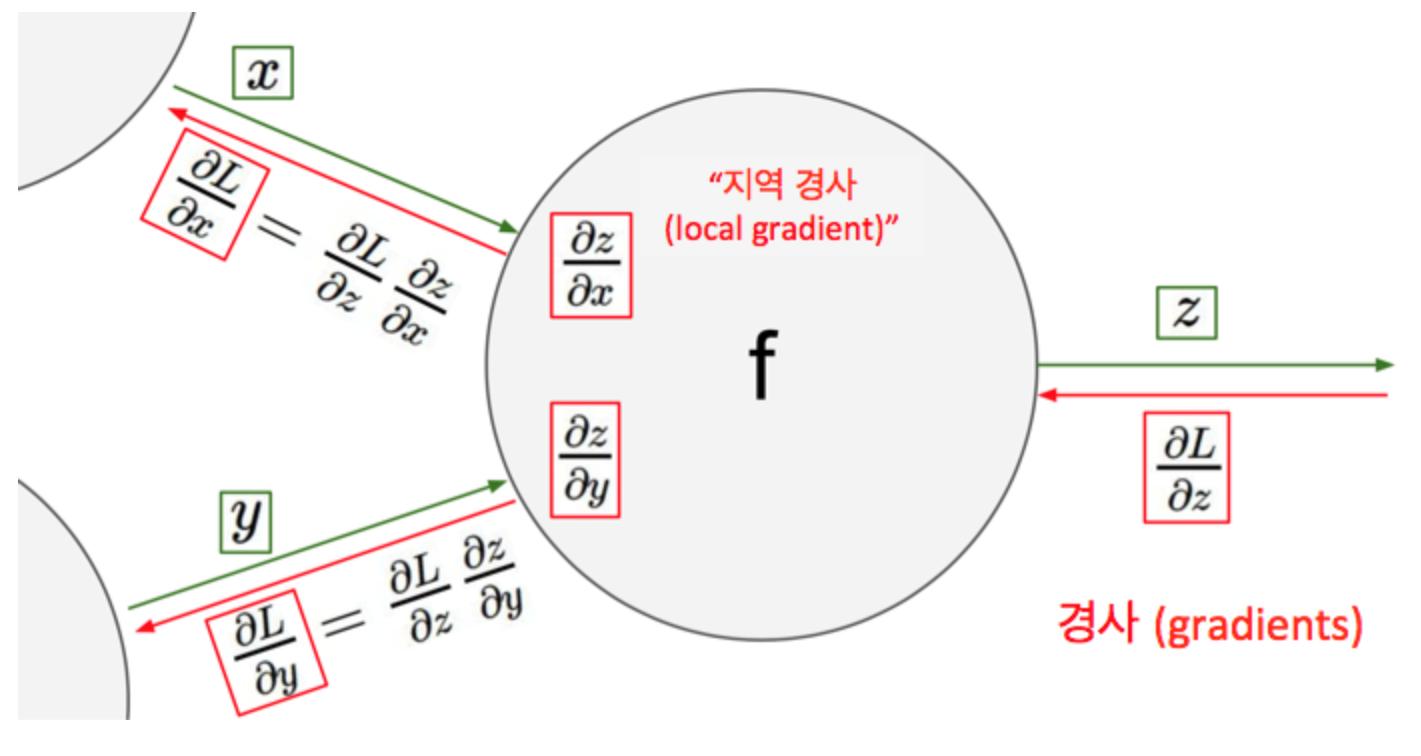

좀 더 자세하게 설명하자면  
forward pass을 하면서 생긴 지역경사 즉, $\partial \over \partial x$와 같은 놈들을  
BP 전단계에서 온 $\partial L \over \partial z$와 곱하면 그것이 다음단계로 이어지는 $\partial L \over \partial x$가 되는 것!

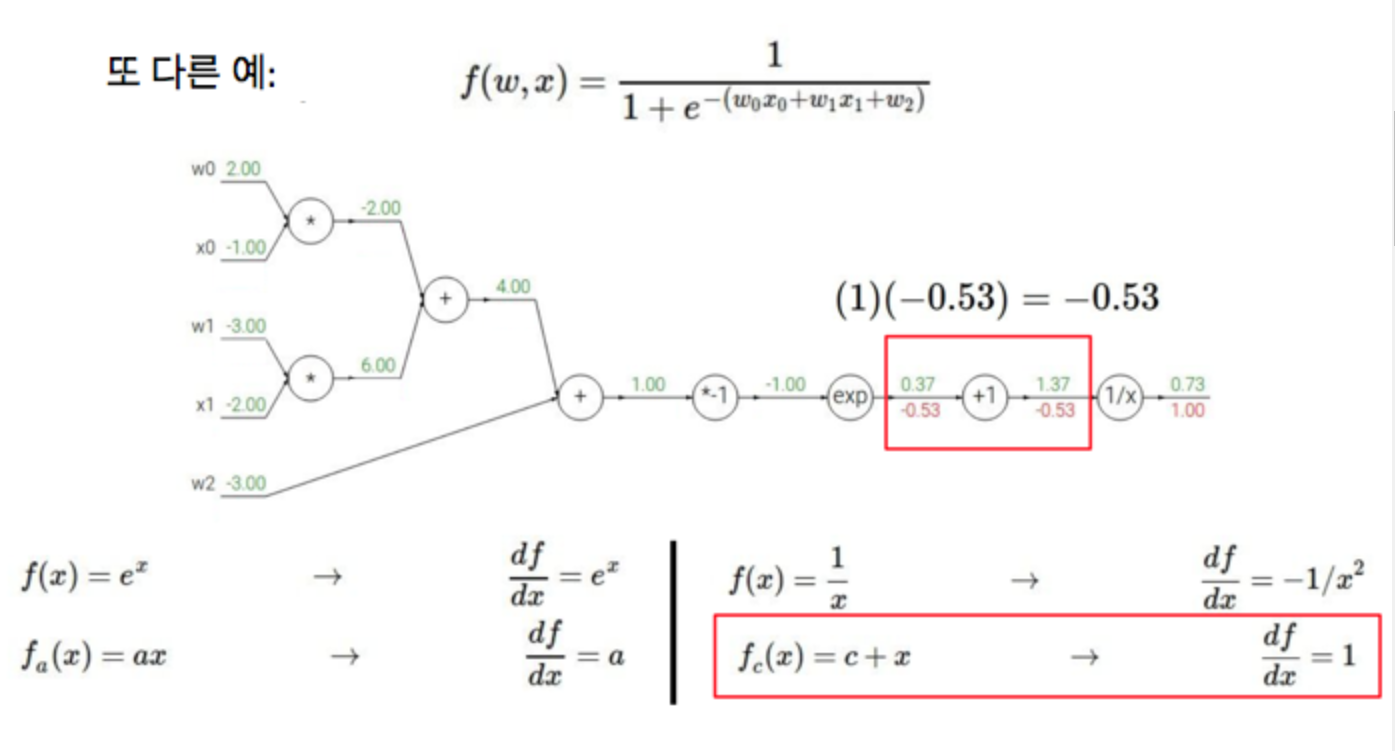

1/x를 dx하면 -1/x^2이 되고 여기에 순전파에서 구해진 1.37을 넣으면 -0.53  
더하기는 그대로 

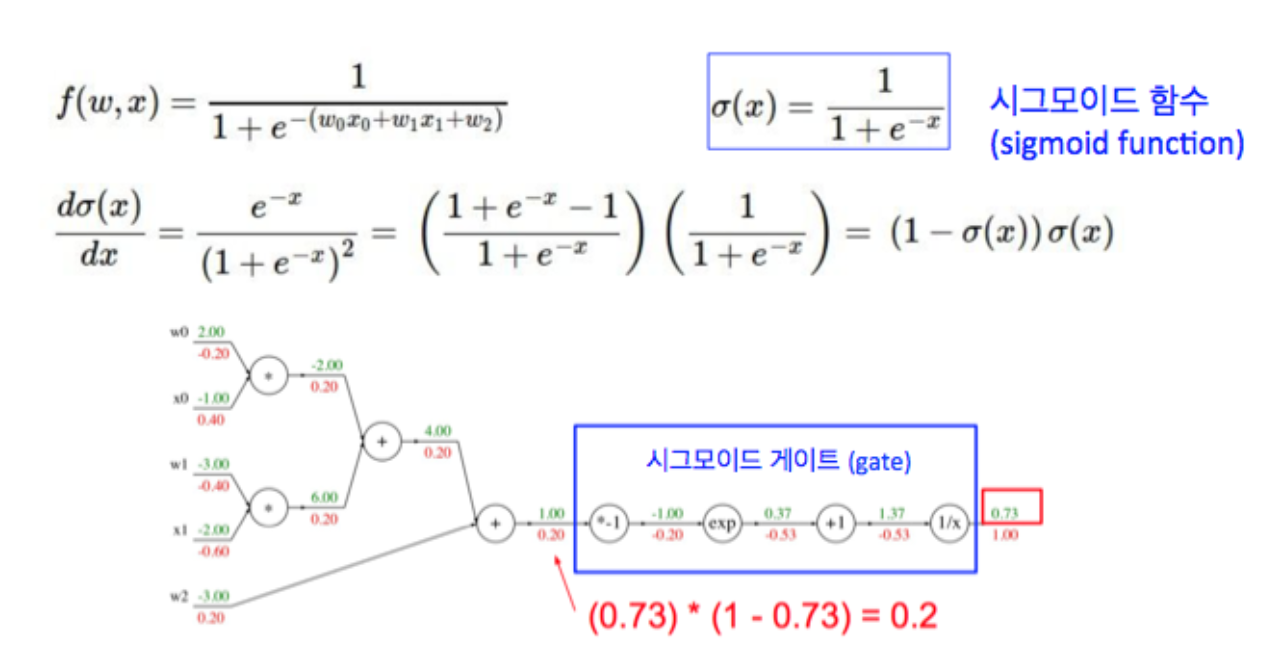

max 게이트는 뭘까? -> 경사 라우터

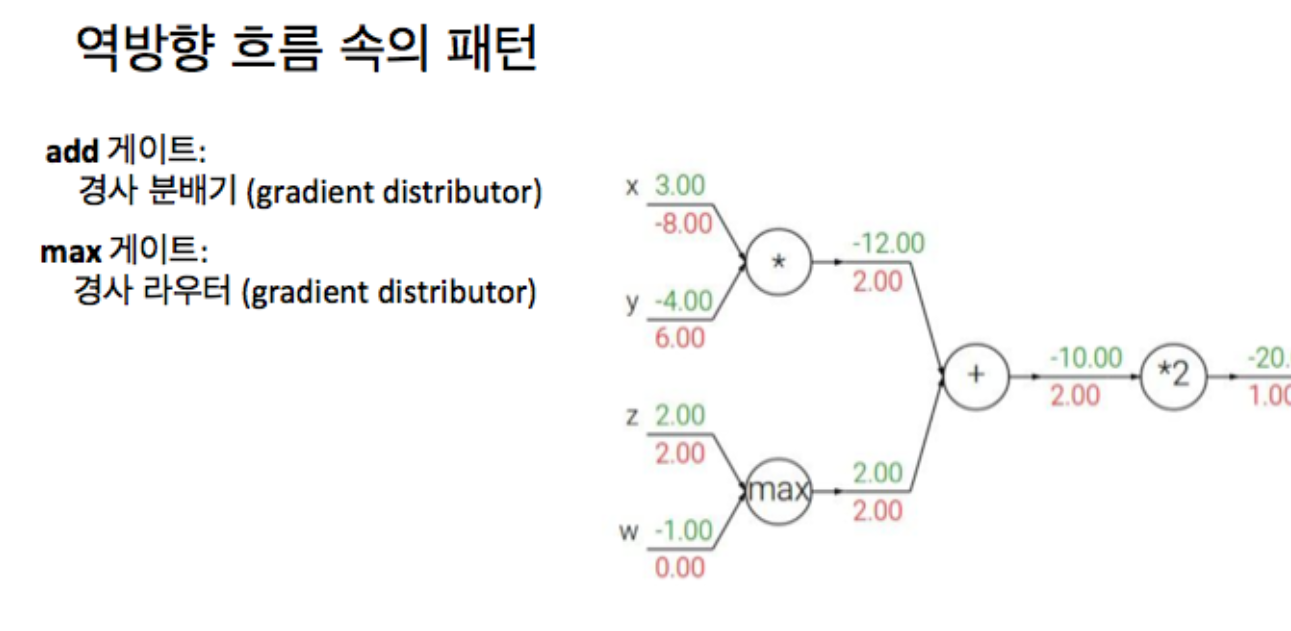

위처럼 max는 하나만 취하기 때문에 backprop때 한 곳은 업스트림 경사가 0이 됨

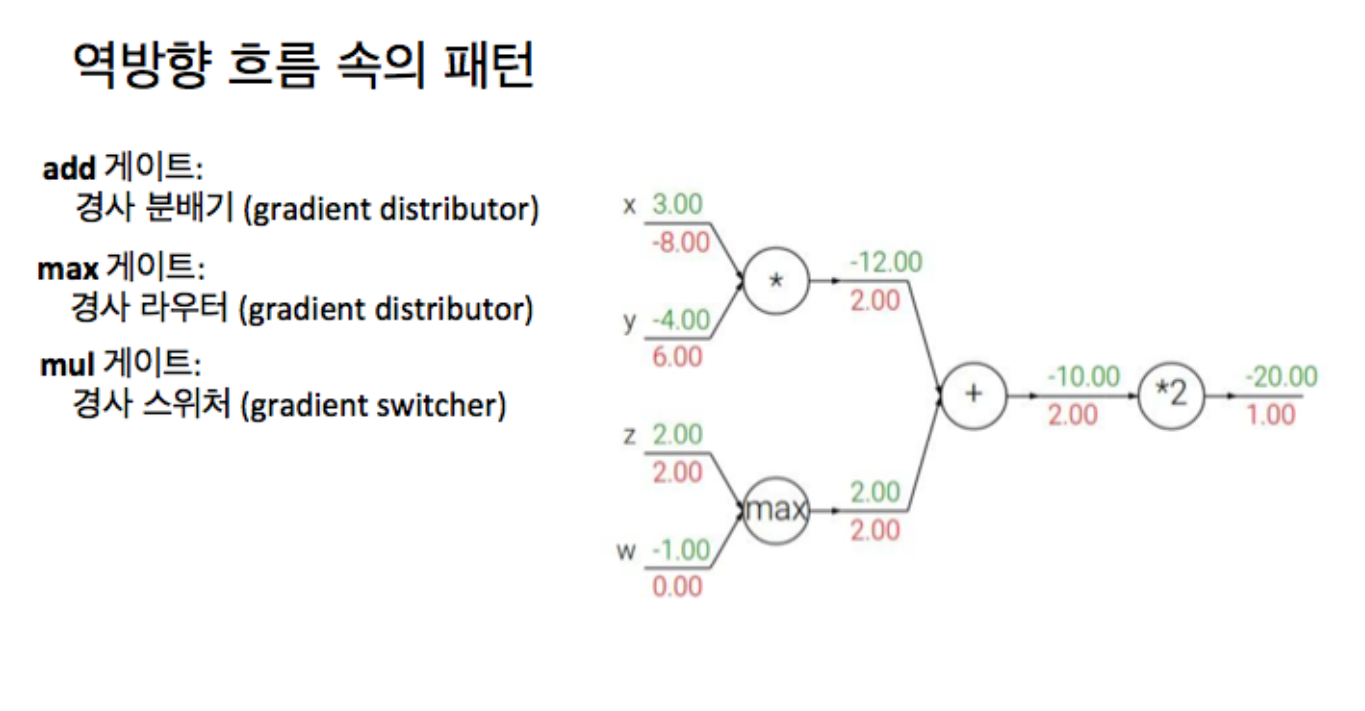

mul 게이트 *는 경사 스위처라 함.  
위에서처럼 지역경사가 다른 변수의 값이기 때문.

### 벡터의 경우

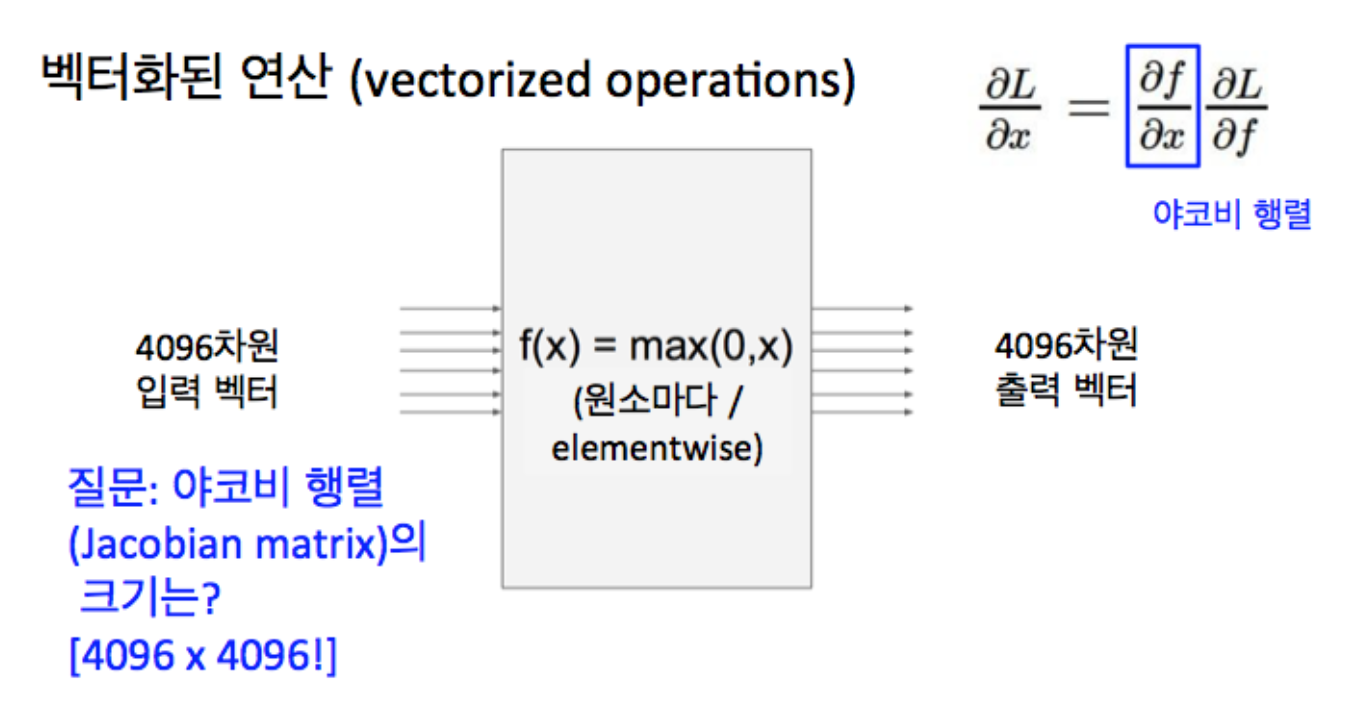

크기가 4096 x 4096인 이유는 입력이 4096 벡터이고 출력이 4096벡터이기 위해선 행렬의 법칙 때문에 4096x4096이여야만 정의가 됨.

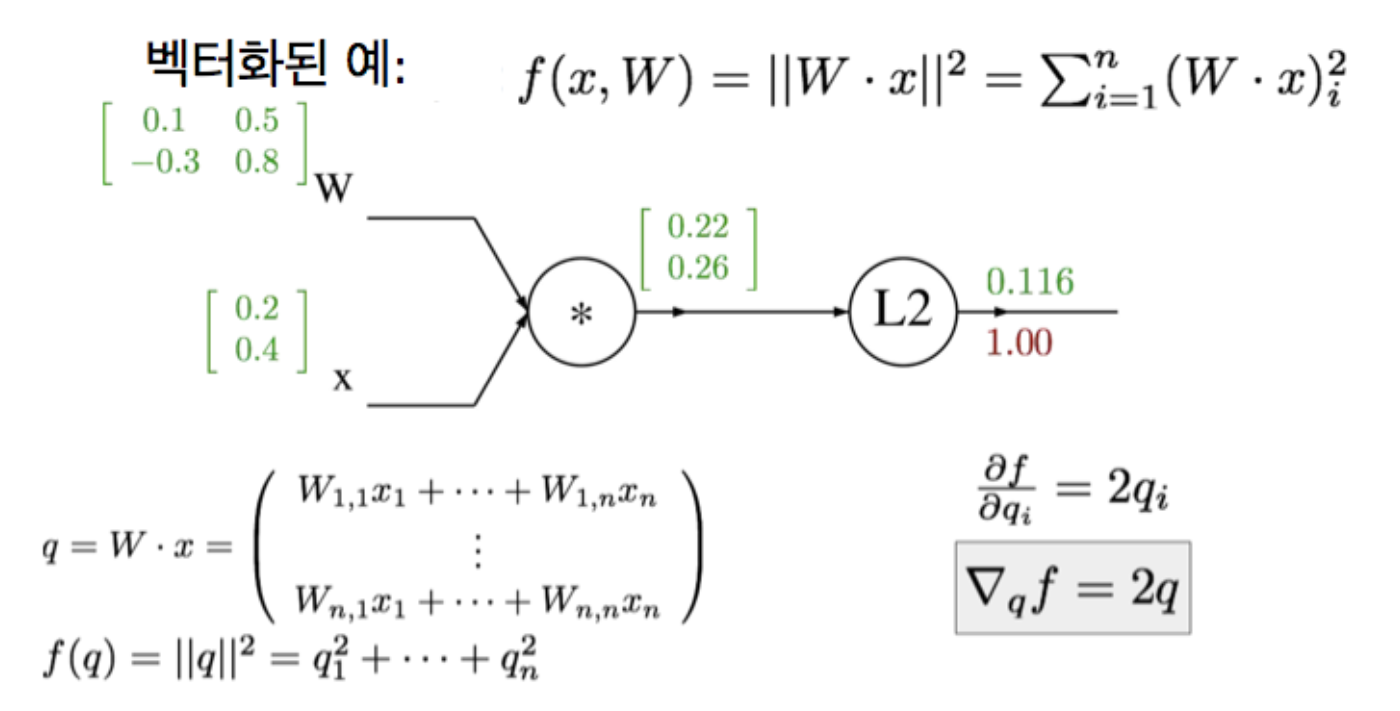

갑자기 생각난 것: 손실함수 생긴 이유: 백프로포게이션 해주려고 원래는 백prop 안되고 가중치를 임의로 바꿔주면서 최적화 했었음

## Neural Network

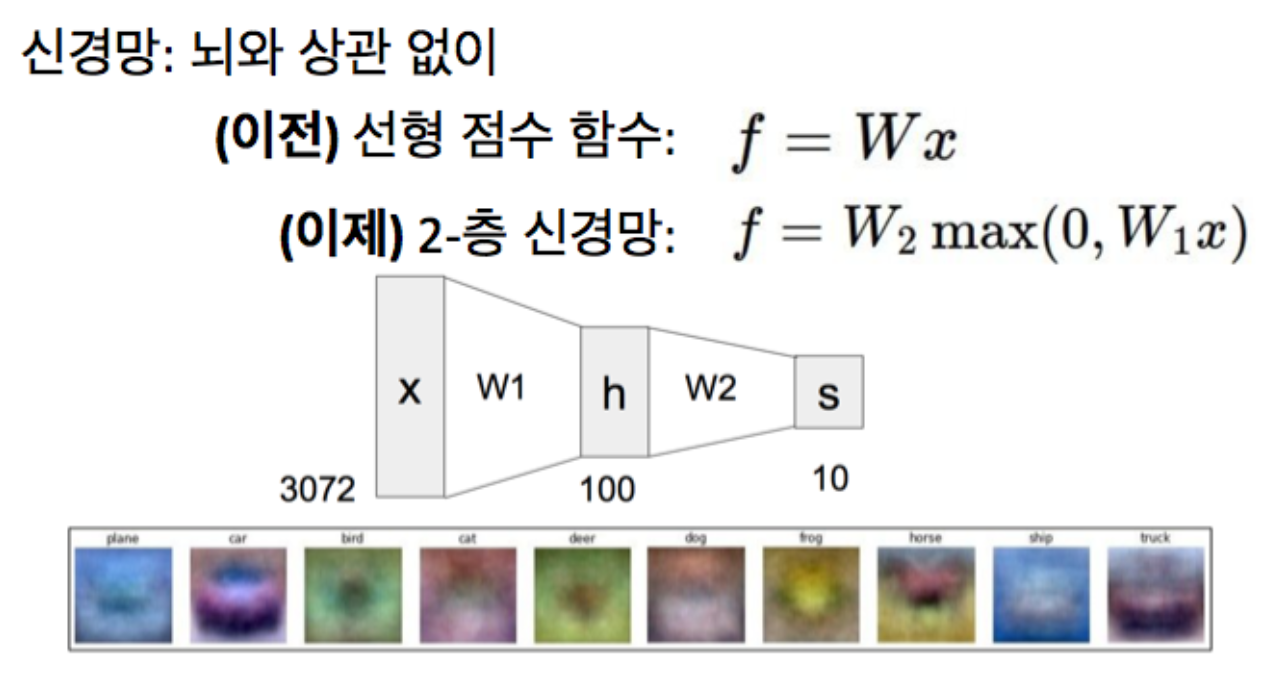

선형 -> 비선형 -> 선형 이런식으로 쌓음  
이유: 차를 예로 들었을 때 차 사진마다 색과 방향 등이 다르기 때문에 여러 레이어 망을 둠으로써 다른 feature 레이어를 가질 수 있게 되기 때문

# 5강  
## CNN

역사를 보면 퍼셉트론 머신이 있는데 여기엔 역전파 기법이 x였음  
처음으로 역전파가 소개된 것은 루멀하트의 논문 여기에 chain rule도 나옴 (망 아키텍처 원칙)

그러고 2012년 제프 힌턴의 연구실에서 알렉스가 만ㄷ는 알렉스 넷! 그 이후로 CNN 유행

오늘날 요약: 어디에나 있고, GPU 발달로 가능해짐

#### 완전 연결 계층 Fully Connected Layer  
32x32x3 이미지를 3027x1로 늘리고 Wx(10x3072)와 내적 한 후 활성화 함수(1x10)을 내적하면 10개의 뉴런 출력이 나옴.

이제부터 배울 합성곱 계층은 32x32x3의 이미지 구조를 그대로 유지 할 것임  
그리고 가중치를 필터로 할 거임. 여기선 5x5x3  
slide하면서 나온 내적 결과들이 모여 출력 활성 지도가 됨.  
여기서 옛날에 배운 stride 개념도 살짝 나옴.  


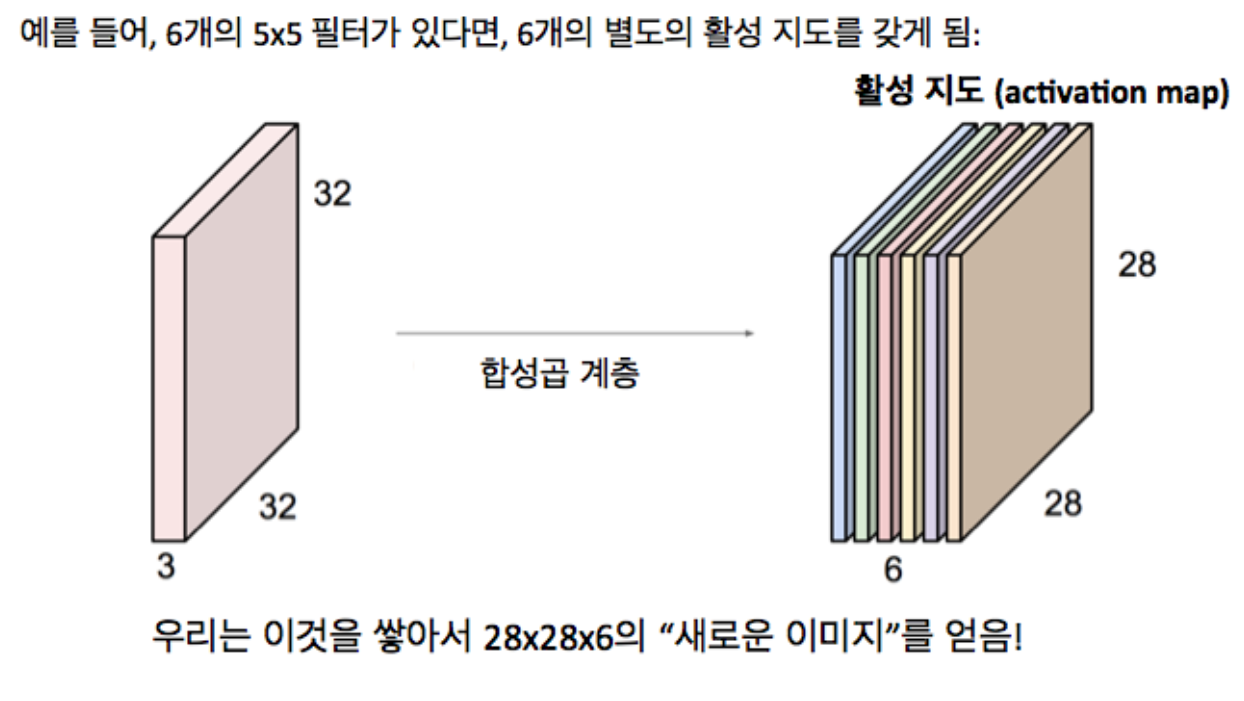

색이나 방향의 다양성?을 위해 여러 필터를 사용해서 활성 지도를 만들어버림

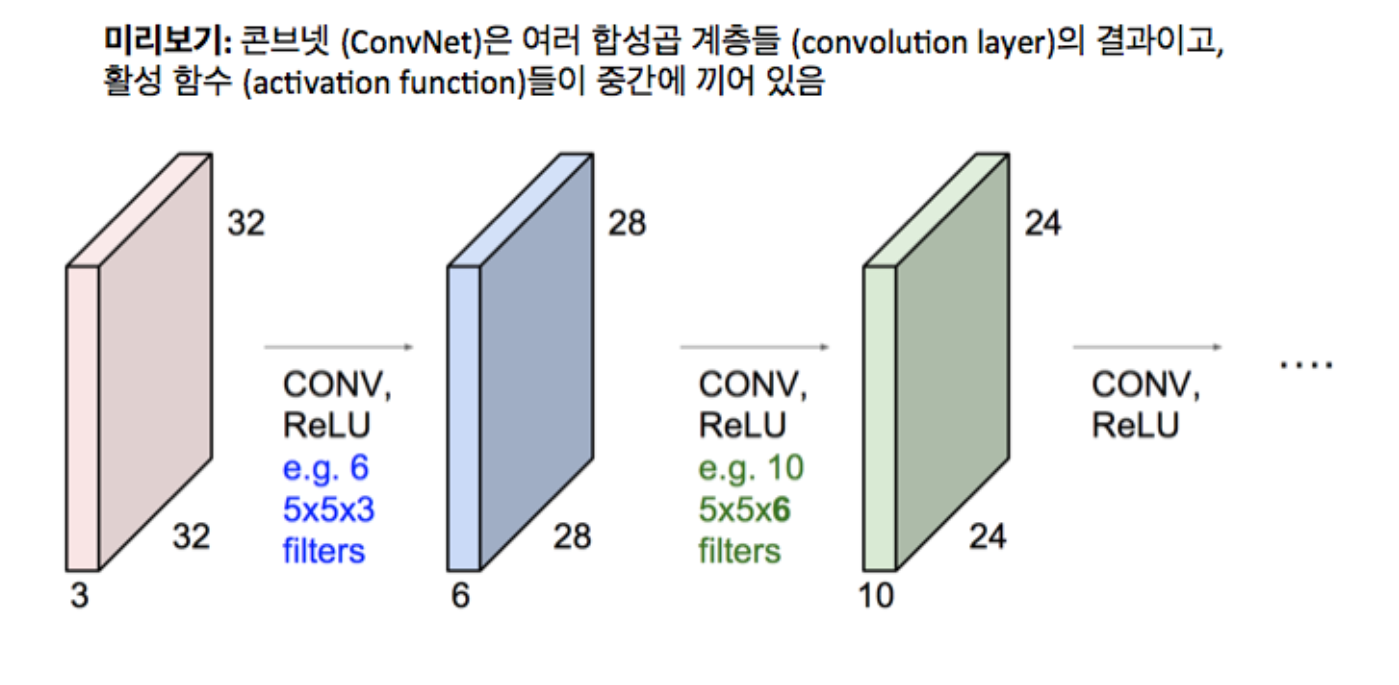

콘브넷도 여러 합성곱 계층들을 쌓은 것임.  
그리고 위에서 얘기한 것 처럼 각 계층은 여러개의 필터를 갖고 있음.

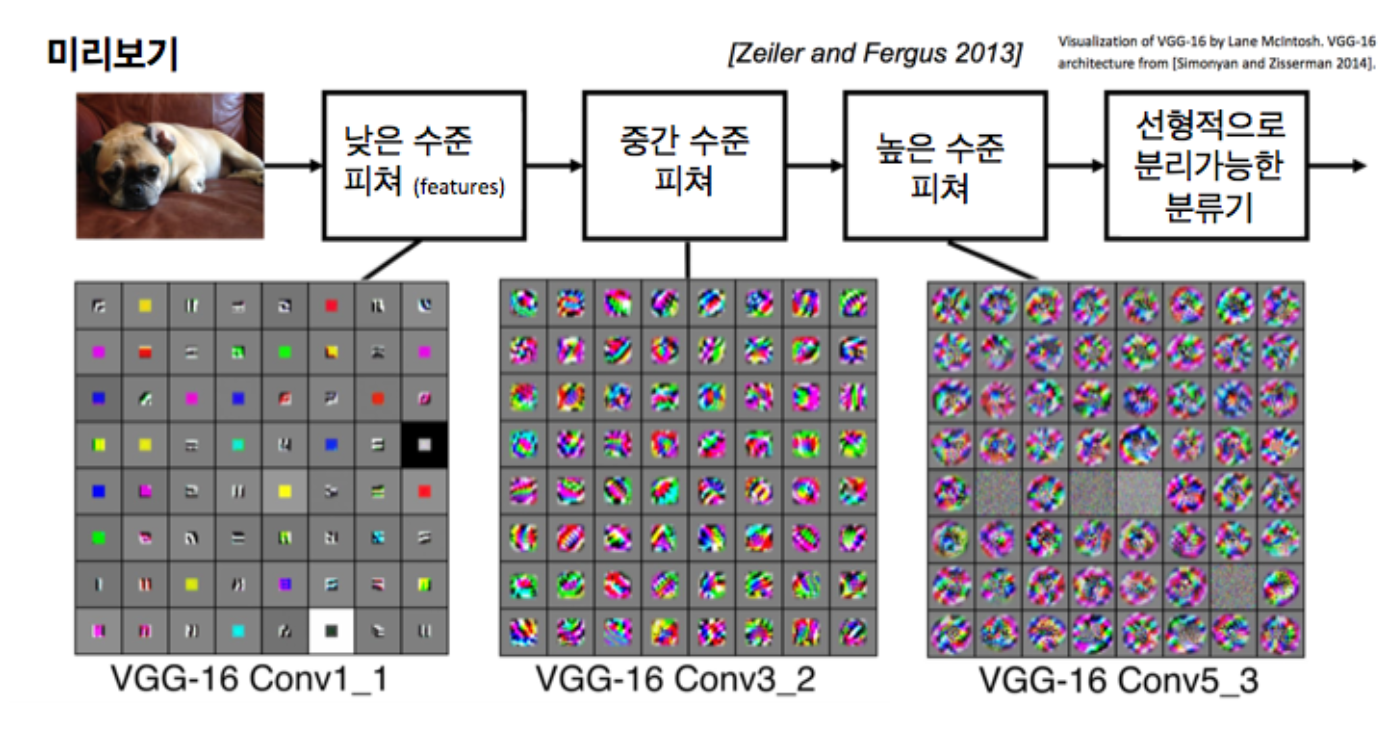

초기 레이어의 필터들은 낮은 수준의 피쳐들 즉 엣지 같은 것들을 표현하고 가면 갈수록 복잡한 종류의 피쳐들을 표현함.

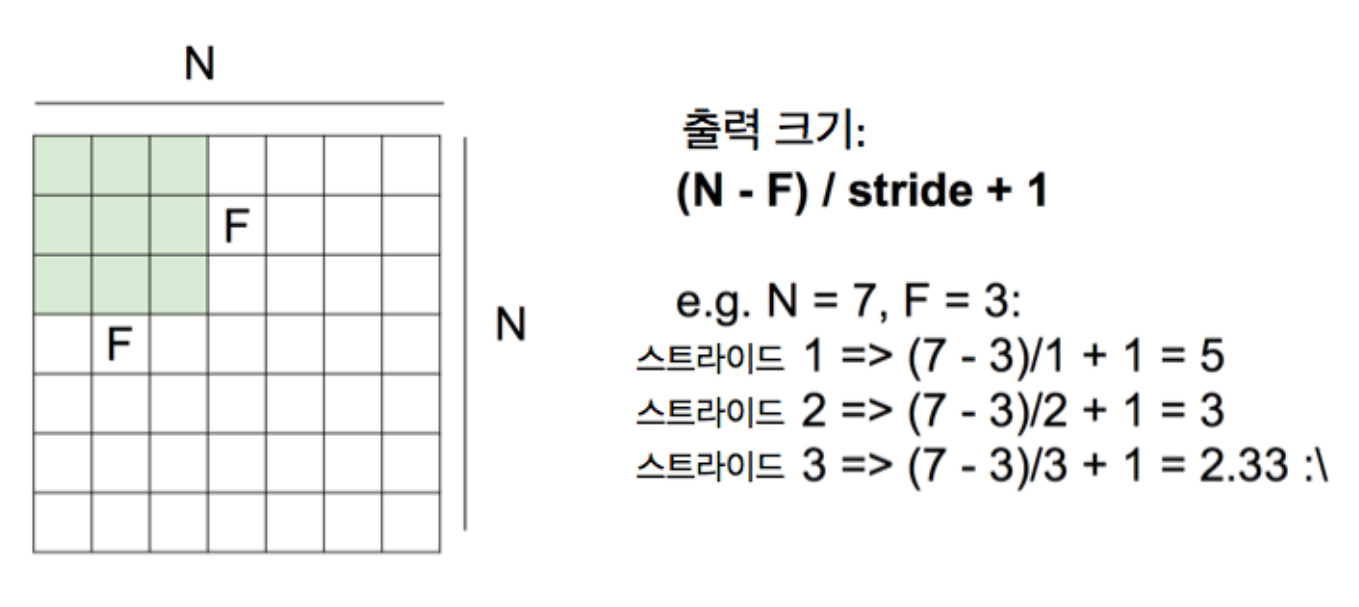

주의할 점: 위처럼 7x7일 때 stride 3을 넣는 건 불가능

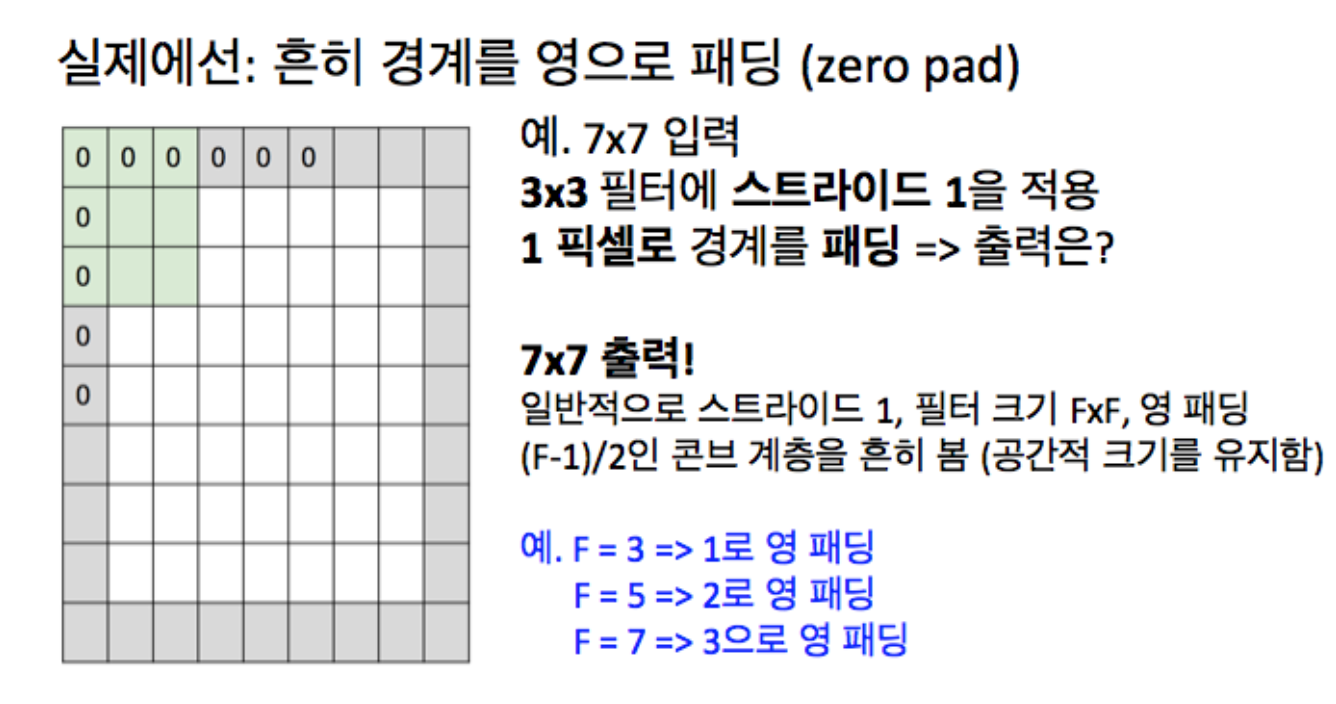

패딩은 0으로 하는 것이 흔함.  
패딩을 하는 이유는 입력의 크기를 유지하려는 것.(가장 자리 정보 일부를 잃지 않도록)


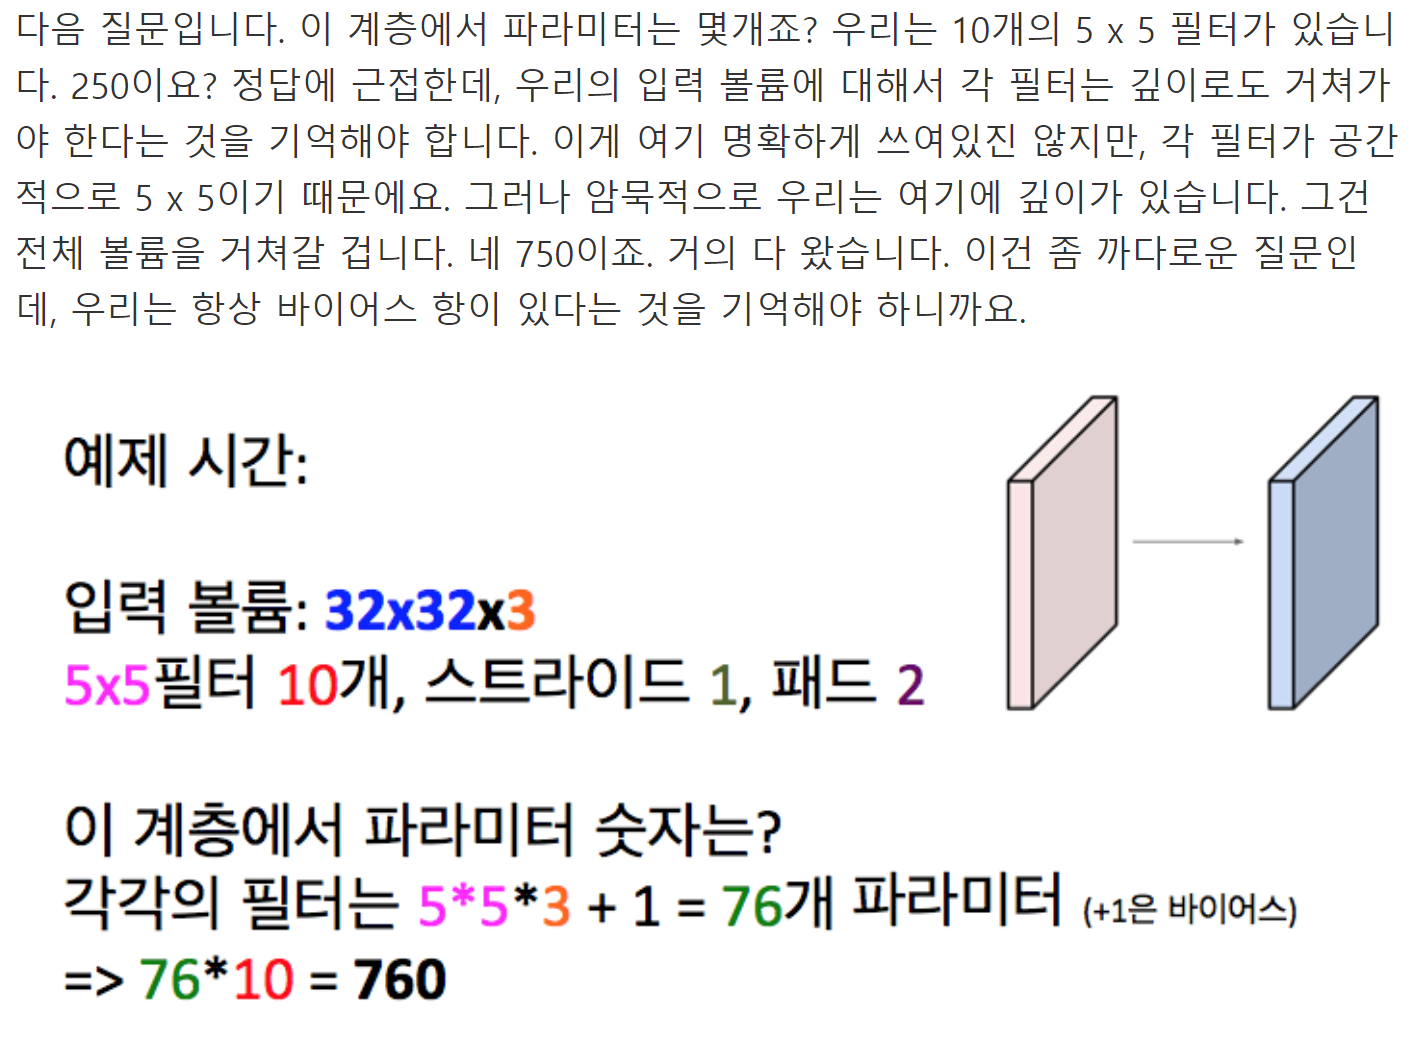

위에서의 파라미터는 필터 5x5가 10개 있으니 250에다가  원래의 깊이 3을 곱해서 750 마지막으로 각 필터에는 1개의 바이어스 항이 있어서 총 760개